In [2]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

In [3]:
united = bpd.read_csv('data/united_summer2015.csv').get(['Delay'])
united

,Delay
0,257
1,28
2,-3
...,...
13822,3
13823,-1
13824,-2


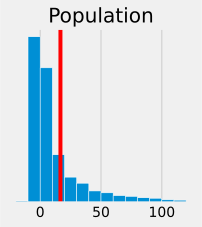

In [12]:
bins = np.arange(-20, 130, 10)
united_mean = united.get('Delay').mean()

united.plot(kind='hist', y='Delay', bins=bins, density=True, ec='w', 
            title='Population', figsize=(3, 3))
plt.ylabel('');
plt.yticks([]);
plt.axvline(x=united_mean, c='r', label='pop mean');
plt.gca().get_legend().remove();
plt.savefig('figures/pop.svg')

In [15]:
def sample(N, i):
    (united
     .sample(N)
     .plot(kind='hist', y='Delay', bins=bins, density=True, ec='w',
           title='Sample',
           figsize=(3, 3))
    );
    plt.ylabel('');
    plt.yticks([]);
    plt.axvline(x=united_mean, c='r', label='pop mean');
    plt.gca().get_legend().remove()
    plt.savefig(f'figures/sample{i}.svg')
#     plt.show()

In [ ]:
for i in range(5):
    sample(20, i)

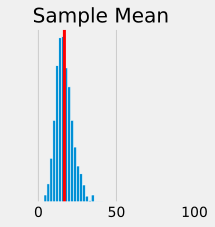

In [23]:
sample_size = 50
repetitions = 1000
sample_means = np.array([])

for n in np.arange(repetitions):
    m = united.sample(sample_size).get('Delay').mean()
    sample_means = np.append(sample_means, m)

(bpd.DataFrame()
 .assign(sample_means=sample_means)
 .plot(kind='hist', bins=20, density=True, ec='w',
       title=f'Sample Mean',
       figsize=(3, 3))
);

plt.xlim(-20, 100)
    
plt.ylabel('');
plt.yticks([]);
plt.axvline(x=united_mean, c='r', label='pop mean', lw=3);
plt.gca().get_legend().remove()
plt.savefig(f'figures/sampling.svg')